# Feature Selection with upsampling

This post seems to be a little bit messy but mainly I tried to figure out which sampling strategy I have to use. I start with upsampling strategy and tested the data with different classification methods.  

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Data

In [2]:
data = pd.read_csv('thl_recoded.csv')
data.head()

,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,"age_bins_(34, 44]","age_bins_(44, 54]","age_bins_(54, 70]",education_1.0,education_2.0,education_3.0,education_4.0,violence_treat_1.0,violence_treat_2.0,violence_treat_3.0
0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,13.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,3.0,2.0,23.0,17.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,5.0,1.0,2.0,1.0,4.0,3.0,24.0,18.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,7.0,2.0,2.0,1.0,3.0,2.0,22.0,12.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,5.0,1.0,1.0,1.0,3.0,2.0,24.0,16.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [3]:
 # Kannabis use
data['kannabis'].value_counts(normalize= True)

0.0    0.914525
1.0    0.085475
Name: kannabis, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [5]:
print('Dimension of X train: ', X_train.shape)
print('Target 1: ', np.count_nonzero(y_train == 1))
print('Target 0: ', np.count_nonzero(y_train == 0))



print('\n ---------------------\n')
print('Dimension of X test :', X_test.shape)
print('Target 1: ', np.count_nonzero(y_test == 1))
print('Target 0: ', np.count_nonzero(y_test == 0))




Dimension of X train:  (2260, 55)
Target 1:  193
Target 0:  2067

 ---------------------

Dimension of X test : (969, 55)
Target 1:  83
Target 0:  886


## 1.1. Scaling

Robust Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).



In [6]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
X_train_std = robust.fit_transform(X_train)
X_test_std = robust.transform(X_test)

# 2. Model

In [7]:
# Oversampling with SMOTE 

# Because the Target is imbalance, i try to balance the data with SMOTE(OverSampling)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train_std, y_train)


print('Dimension of X train with SMOTE: ', X_oversample.shape)
print('\n -------------- ')
print('Target 1 after SMOTE: ', np.count_nonzero(y_oversample == 1))
print('Target 0 after SMOTE: ', np.count_nonzero(y_oversample== 0))


Dimension of X train with SMOTE:  (4134, 55)

 -------------- 
Target 1 after SMOTE:  2067
Target 0 after SMOTE:  2067


In [10]:
def plot_matrics(y_pred, y_test):    
    
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
    print('Precision:', np.round(metrics.precision_score(y_test, y_pred,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, y_pred,
                                               average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred,
                                               average='weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),4))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, y_pred),4)) 

    from sklearn.metrics import roc_auc_score
    print("roc_auc_score:", roc_auc_score(y_test, y_pred, average=None))

    print('\t\tClassification Report:\n', metrics.classification_report(y_pred,y_test))


    from sklearn.metrics import confusion_matrix
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))


    #Plot Confusion Matrix
    from sklearn.metrics import confusion_matrix
    from io import BytesIO #neded for plot
    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt

    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


    plt.xlabel('true label')
    plt.ylabel('predicted label');

    plt.savefig("Confusion.jpg")
    # Save SVG in a fake file object.
    f = BytesIO()
    plt.savefig(f, format="svg")

## 2.1. Random Forest

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfecv= RFECV(estimator=RandomForestClassifier())

model = RandomForestClassifier(n_estimators=100, random_state=92116)

In [13]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=92116)
n_scores = cross_val_score(pipeline, X_oversample, y_oversample, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9717928219197508

In [14]:
pipeline.fit(X_oversample, y_oversample)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=RandomForestClassifier())),
                ('Model', RandomForestClassifier(random_state=92116))])

In [15]:
print('Optimal number of features : %d' % rfecv.n_features_)

Optimal number of features : 43


In [16]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True])

Accuracy: 0.9381
Precision: 0.9307
Recall: 0.9381
F1 Score: 0.9312
Cohen Kappa Score: 0.521
Matthews Corrcoef: 0.5389
roc_auc_score: 0.7149908890641573
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       918
         1.0       0.45      0.73      0.55        51

    accuracy                           0.94       969
   macro avg       0.71      0.84      0.76       969
weighted avg       0.96      0.94      0.94       969

Confusion Matrix:
 [[872  14]
 [ 46  37]]


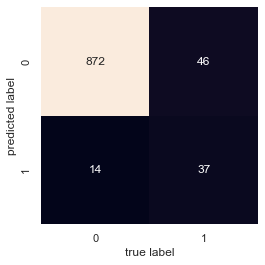

In [24]:
# results
rf_y_pred = pipeline.predict(X_test_std)
plot_matrics(rf_y_pred, y_test)

## 2.2. RFE GradientBoostingClassifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=GradientBoostingClassifier())
model = GradientBoostingClassifier()

In [16]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_oversample, y_oversample, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9642935805850397

In [17]:
pipeline.fit(X_oversample, y_oversample)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

In [18]:
print('Optimal number of features : %d' % rfecv.n_features_)

Optimal number of features : 20


In [19]:
rfecv.support_rfecv_df = pd.DataFrame(rfecv.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv.support_rfecv_df.head(15)

,Rank
alcohol_use,1
drug_punishment_2.0,1
violence_treat_2.0,1
household_3.0,1
household_2.0,1
"age_bins_(24, 34]",1
purchase_offer_1,1
free_offer_1,1
drug_punishment_3.0,1
intoxicant_access,1


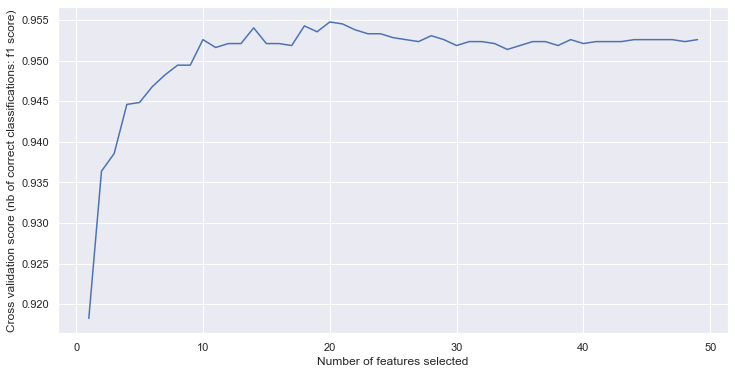

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications: f1 score)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Accuracy: 0.935
Precision: 0.9302
Recall: 0.935
F1 Score: 0.932
Cohen Kappa Score: 0.5479
Matthews Corrcoef: 0.5511
roc_auc_score: 0.7515162229051646
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       901
         1.0       0.53      0.65      0.58        68

    accuracy                           0.93       969
   macro avg       0.75      0.80      0.77       969
weighted avg       0.94      0.93      0.94       969

Confusion Matrix:
 [[862  24]
 [ 39  44]]


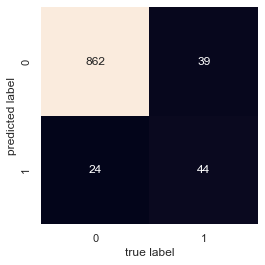

In [21]:
# results
gbc_y_pred = pipeline.predict(X_test_std)
plot_matrics(gbc_y_pred, y_test)

## 2.3. SVC

In [22]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.

rfecv = RFECV(estimator=SVC(kernel="linear"))

model = SVC(kernel="linear")

In [23]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_oversample, y_oversample, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9241956012351747

In [24]:
pipeline.fit(X_oversample, y_oversample)

Pipeline(steps=[('Feature Selection', RFECV(estimator=SVC(kernel='linear'))),
                ('Model', SVC(kernel='linear'))])

In [25]:
print('Optimal number of features : %d' % rfecv.n_features_)

Optimal number of features : 47


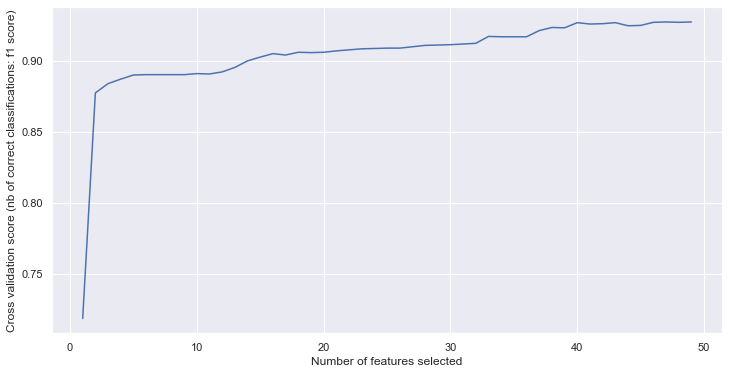

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications: f1 score)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Accuracy: 0.8813
Precision: 0.9343
Recall: 0.8813
F1 Score: 0.8989
Cohen Kappa Score: 0.4901
Matthews Corrcoef: 0.5334
roc_auc_score: 0.8641246702385162
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       797
         1.0       0.84      0.41      0.55       172

    accuracy                           0.88       969
   macro avg       0.86      0.70      0.74       969
weighted avg       0.88      0.88      0.86       969

Confusion Matrix:
 [[784 102]
 [ 13  70]]


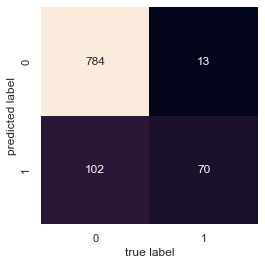

In [27]:
# results
svc_y_pred = pipeline.predict(X_test_std)
plot_matrics(svc_y_pred, y_test)

In [28]:
# list of features for further use
rfecv.support_rfecv_df = pd.DataFrame(rfecv.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)

dt_columns = rfecv.support_rfecv_df [rfecv.support_rfecv_df ['Rank']==1].reset_index()
dt_columns = list(np.array(dt_columns['index']))
dt_columns 

['alcohol_use',
 'free_offer_1',
 'purchase_offer_1',
 'alcohol_hp_1',
 'drug_hp_1',
 'medicine_hp_1',
 'poly_hp_1',
 'doping_hp_1',
 'gender_3',
 'age_bins_(24, 34]',
 'drug_punishment_3.0',
 'age_bins_(34, 44]',
 'age_bins_(54, 70]',
 'household_2.0',
 'household_3.0',
 'education_2.0',
 'education_3.0',
 'education_4.0',
 'violence_treat_2.0',
 'violence_treat_3.0',
 'drug_punishment_2.0',
 'age_bins_(44, 54]',
 'rural_1',
 'drug_user_friend_1',
 'midsize_city_1',
 'nuuska',
 'cigarette',
 'e_cigarette',
 'prob_country',
 'prob_resident',
 'risk_of_use',
 'risk_of_try',
 'cannabis_access',
 'other_drug_access',
 'intoxicant_access',
 'small_city_1',
 'doping_access',
 'sport',
 'has_child_1',
 'non_medical_1',
 'single_1',
 'divorced_1',
 'in_relation_1',
 'helsinki_1',
 'bigger_city_1',
 'current_health',
 'drug_punishment_4.0']

# 3. Summary

It seems that upsampling stragegies improve the f1 score and some other indicators but the model still beyond the satisfactory level, which enforces us to try downsampling and hybrit sampling techniques. 